In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/lenovo/Desktop/Machine Learning/data.csv")
data.head(1)

,Type of Search,Company Type,Company Name,Job Freshness,Rating,Skills,R/O/H,Updated Compensation,Location Tag,Extracted Place,Location,City,State,Country,Compensation,Experience Number,Classified Job Roles
0,Keyword,Corporate,FabHotels,7 Days Ago,3.1,Testing tools| MySQL| Shell scripting| Javascr...,Onsite,10-15 Lakhs,Location_1,Pune,NaN,Pune,Maharashtra,India,15.0,9,QA


In [3]:
data.columns

Index(['Type of Search', 'Company Type', 'Company Name', 'Job Freshness',
       'Rating', 'Skills', 'R/O/H', 'Updated Compensation', 'Location Tag',
       'Extracted Place', 'Location', 'City', 'State ', 'Country',
       'Compensation', 'Experience Number', 'Classified Job Roles'],
      dtype='object')

In [26]:
df = data[['Skills', 'Experience Number', 'Compensation']]
df.head()

,Skills,Experience Number,Compensation
0,Testing tools| MySQL| Shell scripting| Javascr...,9,15.0
1,Testing tools| MySQL| Shell scripting| Javascr...,9,15.0
2,Computer science| Software design| C| Coding| ...,12,15.0
3,Software design| jQuery| Visual Basic| MySQL| ...,9,15.0
4,Publishing| Linux| Coding| Consulting| Active ...,8,15.0


In [27]:
df['Skills'].head()

0    Testing tools| MySQL| Shell scripting| Javascr...
1    Testing tools| MySQL| Shell scripting| Javascr...
2    Computer science| Software design| C| Coding| ...
3    Software design| jQuery| Visual Basic| MySQL| ...
4    Publishing| Linux| Coding| Consulting| Active ...
Name: Skills, dtype: object

In [28]:
df['No_of_skills'] = df['Skills'].str.count(r'\|')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6536\3355420191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_skills'] = df['Skills'].str.count(r'\|')


In [29]:
df = df[['Experience Number', 'No_of_skills', 'Compensation']]
df.head(1)

,Experience Number,No_of_skills,Compensation
0,9,7,15.0


In [30]:
df.dtypes

Experience Number      int64
No_of_skills           int64
Compensation         float64
dtype: object

In [31]:
df.shape

(992657, 3)

In [33]:
print(df.isnull().sum())
print(df.shape)

Experience Number    0
No_of_skills         0
Compensation         0
dtype: int64
(992657, 3)


In [34]:
df['Experience Number'].unique()


array([ 9, 12,  8, 13, 20,  7, 15, 14, 10, 18,  6,  5,  4, 17, 16,  3, 11,
       19,  2,  1, 30, 22, 24, 25,  0, 23, 21, 26, 28, 27])

In [35]:
df['Compensation'].unique()

array([ 15.        ,  12.        ,  14.        ,  11.        ,
        10.        ,  24.        ,  20.        ,  13.        ,
        18.        ,  17.        ,  16.        ,  19.        ,
        25.        ,  23.        ,  22.        ,  30.        ,
        32.5       ,  22.5       ,  16.5       ,  27.5       ,
        35.        ,  31.        ,  50.        ,  80.        ,
        40.        ,  45.        ,  60.        ,  75.        ,
       100.        , 500.        ,   3.        ,   3.5       ,
         5.        ,   6.        ,   1.25      ,   2.        ,
         2.5       ,   1.75      ,   3.25      ,   0.8       ,
         4.25      ,   7.        ,   4.        ,   7.5       ,
         0.7       ,   5.5       ,   4.5       ,   3.75      ,
         0.9       ,   4.4       ,   1.5       ,   9.        ,
         8.5       ,   8.        ,   6.5       ,   4.75      ,
        15.5       ,  21.        ,  32.        ,  33.        ,
        37.5       ,  55.        ,  70.        ,   0.5 

In [36]:
df = df[df['Compensation']<=150]
df.shape


(992611, 3)

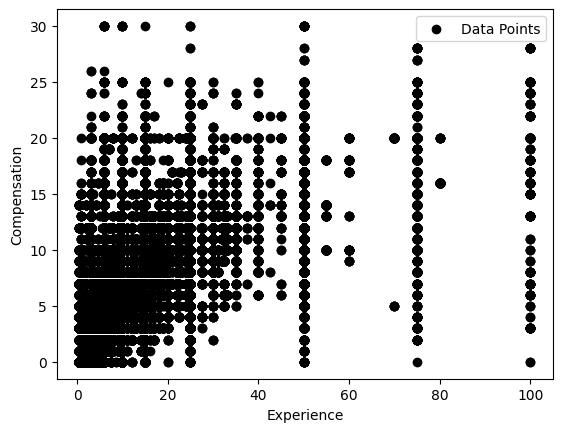

In [37]:
plt.scatter( df['Compensation'],df['Experience Number'], marker='o', color='black', label='Data Points')
plt.xlabel("Experience")
plt.ylabel("Compensation")
plt.legend()
plt.show()

In [38]:
df.head()

,Experience Number,No_of_skills,Compensation
0,9,7,15.0
1,9,7,15.0
2,12,7,15.0
3,9,7,15.0
4,8,7,15.0


In [39]:
df.describe()

,Experience Number,No_of_skills,Compensation
count,992611.000000,992611.000000,992611.000000
mean,6.249326,6.828028,10.759946
std,3.359123,0.698236,8.553378
min,0.000000,0.000000,0.500000
25%,4.000000,7.000000,6.000000
50%,5.000000,7.000000,10.000000
75%,8.000000,7.000000,15.000000
max,30.000000,8.000000,100.000000


In [41]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[['Experience Number', 'No_of_skills', 'Compensation']])
scaled_df = pd.DataFrame(scaled_data, columns=['Experience Number', 'No_of_skills', 'Compensation'])
print(scaled_df)


        Experience Number  No_of_skills  Compensation
0                0.300000         0.875      0.145729
1                0.300000         0.875      0.145729
2                0.400000         0.875      0.145729
3                0.300000         0.875      0.145729
4                0.266667         0.875      0.145729
...                   ...           ...           ...
992606           0.266667         0.875      0.145729
992607           0.400000         0.625      0.145729
992608           0.266667         0.875      0.145729
992609           0.366667         0.875      0.145729
992610           0.333333         0.875      0.145729

[992611 rows x 3 columns]


In [42]:
X = scaled_df.iloc[:, :-1]
y = scaled_df['Compensation']

In [43]:
X

,Experience Number,No_of_skills
0,0.300000,0.875
1,0.300000,0.875
2,0.400000,0.875
3,0.300000,0.875
4,0.266667,0.875
...,...,...
992606,0.266667,0.875
992607,0.400000,0.625
992608,0.266667,0.875
992609,0.366667,0.875


In [44]:
y

0         0.145729
1         0.145729
2         0.145729
3         0.145729
4         0.145729
            ...   
992606    0.145729
992607    0.145729
992608    0.145729
992609    0.145729
992610    0.145729
Name: Compensation, Length: 992611, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [47]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_pred = model.predict(X_test)
y_pred

array([0.15026567, 0.08163968, 0.05308144, ..., 0.12119332, 0.08163968,
       0.12413974], shape=(744459,))

In [55]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

-1.5200350701245546

In [57]:
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth' :[1,2,3,4,5,6,7,8,10,11,12],
    'max_features': ['auto', 'sqrt', 'log2']
}
regressor = DecisionTreeRegressor()

In [60]:
from sklearn.model_selection import GridSearchCV
regressorcv= GridSearchCV(regressor, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')

In [ ]:
regressorcv.fit(X_train, y_train)